<a href="https://colab.research.google.com/github/MehrdadJalali-AI/GAN-MOF/blob/main/GAN_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Node Generation Using Generative Adversarial Networks (GANs)
In this Colab notebook, we demonstrate the process of generating new nodes in a graph using Generative Adversarial Networks (GANs). The code provided below was written by **Dr. Mehrdad Jalali**.

**Overview**
1. Data Preparation: Features for existing nodes are prepared. In this example, random features are generated for existing nodes.
2. Generator Model: A GAN model is created with a generator network that takes random noise as input and produces new node features.
3. Discriminator Model: A discriminator network is created to distinguish between real and generated node features.
4. GAN Model: The generator and discriminator are combined to form a GAN model. The discriminator weights are frozen during training of the generator.
5. Training Loop: The GAN model is trained in a loop. At each epoch, the generator generates fake node features, and the discriminator is trained to distinguish between real and fake features. The generator is then trained to fool the discriminator.
6. Node Generation: After training, new nodes are generated using the trained generator.
7. Graph Update: The generated nodes are added to the original graph.
8. Visualization: The original graph and the updated graph with the new nodes are visualized using NetworkX and Matplotlib.


1/1 [==============================] - 0s 158ms/step
Epoch 0: Discriminator Loss = 0.6549099385738373, Generator Loss = 0.5517017245292664
1/1 [==============================] - 0s 22ms/step
Epoch 100: Discriminator Loss = 5.54060697555542, Generator Loss = 6.715570634696633e-05
1/1 [==============================] - 0s 20ms/step
Epoch 200: Discriminator Loss = 6.234408885240555, Generator Loss = 2.6614208763930947e-05
1/1 [==============================] - 0s 20ms/step
Epoch 300: Discriminator Loss = 6.501106575131416, Generator Loss = 5.153222446097061e-06
1/1 [==============================] - 0s 20ms/step
Epoch 400: Discriminator Loss = 7.171132266521454, Generator Loss = 2.168562104998273e-06
1/1 [==============================] - 0s 22ms/step
Epoch 500: Discriminator Loss = 7.434451550245285, Generator Loss = 1.67056009559019e-06
1/1 [==============================] - 0s 24ms/step
Epoch 600: Discriminator Loss = 7.565856963396072, Generator Loss = 1.3868382211512653e-06
1/1 [====

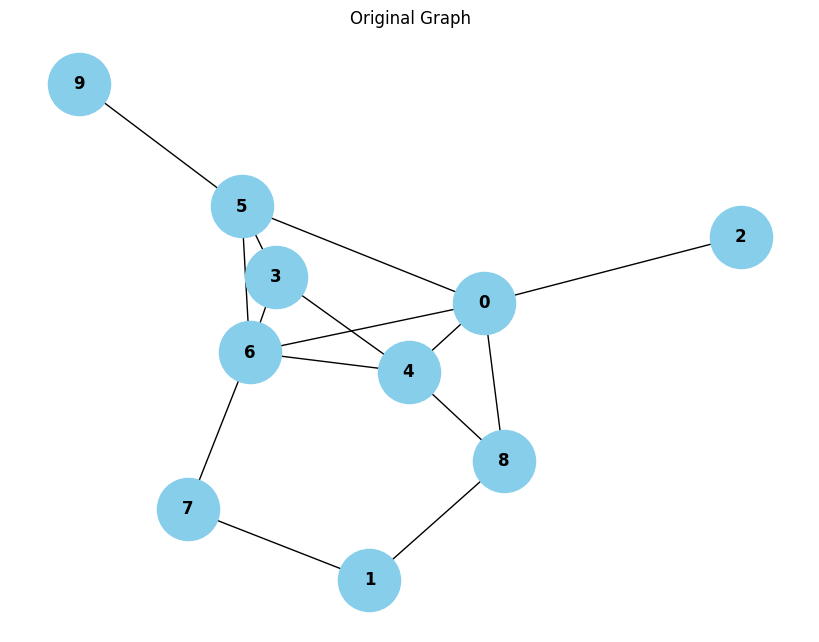

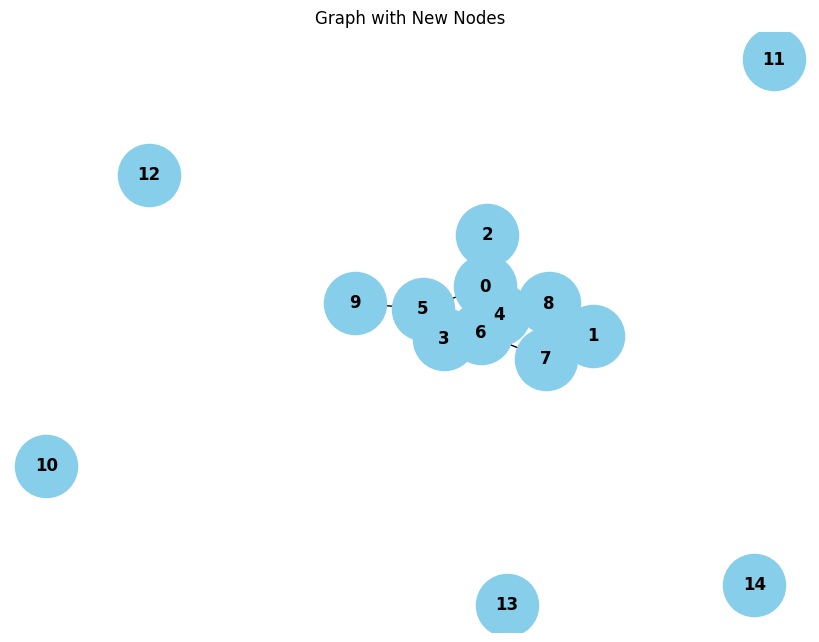

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Function to generate a random graph
def generate_random_graph(num_nodes, num_edges):
    G = nx.gnm_random_graph(num_nodes, num_edges)
    return G

# Function to plot the graph
def plot_graph(G, title):
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, font_size=12, font_weight='bold')
    plt.title(title)
    plt.show()

# Step 1: Data Preparation (features)
# Assuming you have features for existing nodes stored in a numpy array called 'existing_features'
existing_features = np.random.randn(100, 128)  # Example: 100 nodes with 128 features each

# Step 2: Generator Model
latent_dim = 100  # Dimensionality of the latent space
generator_input = Input(shape=(latent_dim,))
generator_output = Dense(128, activation='relu')(generator_input)
generator_output = Dense(128, activation='relu')(generator_output)
generator_output = Dense(128, activation='relu')(generator_output)
generator_output = Dense(existing_features.shape[1], activation='linear')(generator_output)  # Output same dimension as existing features
generator = Model(generator_input, generator_output)

# Step 3: Discriminator Model
discriminator_input = Input(shape=(existing_features.shape[1],))
discriminator_output = Dense(128, activation='relu')(discriminator_input)
discriminator_output = Dense(128, activation='relu')(discriminator_output)
discriminator_output = Dense(1, activation='sigmoid')(discriminator_output)
discriminator = Model(discriminator_input, discriminator_output)

# Step 4: GAN Model
discriminator.trainable = False  # Freeze discriminator weights during GAN training
gan_input = Input(shape=(latent_dim,))
gan_output = discriminator(generator(gan_input))
gan = Model(gan_input, gan_output)
gan.compile(optimizer=Adam(lr=0.0002, beta_1=0.5), loss='binary_crossentropy')

# Compile discriminator
discriminator.compile(optimizer=Adam(lr=0.0002, beta_1=0.5), loss='binary_crossentropy')

# Step 5: Training Loop
num_epochs = 1000
batch_size = 32

for epoch in range(num_epochs):
    # Generate random noise as input for the generator
    noise = np.random.randn(batch_size, latent_dim)

    # Generate fake node features using the generator
    generated_features = generator.predict(noise)

    # Sample real node features from existing data
    real_features = existing_features[np.random.randint(0, existing_features.shape[0], batch_size)]

    # Create labels for real and fake data
    real_labels = np.ones((batch_size, 1))
    fake_labels = np.zeros((batch_size, 1))

    # Train the discriminator
    d_loss_real = discriminator.train_on_batch(real_features, real_labels)
    d_loss_fake = discriminator.train_on_batch(generated_features, fake_labels)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    # Train the generator (via the combined GAN model)
    noise = np.random.randn(batch_size, latent_dim)
    g_loss = gan.train_on_batch(noise, real_labels)

    # Print progress
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Discriminator Loss = {d_loss}, Generator Loss = {g_loss}")

# Generate new nodes using the trained generator
num_new_nodes = 5
new_node_features = generator.predict(np.random.randn(num_new_nodes, latent_dim))

# Generate a random graph
num_nodes = 10
num_edges = 15
G = generate_random_graph(num_nodes, num_edges)

# Plot the original graph
plot_graph(G, "Original Graph")

# Add new nodes to the graph
new_node_indices = range(num_nodes, num_nodes + num_new_nodes)
for node_index, features in zip(new_node_indices, new_node_features):
    G.add_node(node_index, features=features)

# Plot the updated graph with new nodes
plot_graph(G, "Graph with New Nodes")
